<font color="maroon" size="6"><center><b>Logistic Regression</b></center></font>
<font color="Royalblue" size="4"><center>Owner: Sushant Borade</center></font>
<font color="Royalblue" size="4"><center>Mail ID: sushant.9196@gmail.com</center></font>

<font size="4"><b>Loading the Package</b></font>

In [132]:
import pandas as pd
import os as os
import numpy as np

#Visuals
import matplotlib.pyplot as plt
import seaborn as sns

# To split data
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

<font size="4" color="green"><b>User Defined Function</b></font>

In [133]:
def scatter_regplot(x, y, in_data): 
    '''
    Returns Scatter plot with regression trend line
    '''
    
    sns.regplot(x=x, y=y, data=in_data) 
    plt.xlabel(x, fontsize = 13)
    plt.ylabel(y, fontsize = 13)
    plt.title("Scatter Plot of " + x + " & " + y, fontsize = 15)
    plt.grid()
    plt.show()

In [134]:
def HeatMap(df):
    corr = df.corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    f, ax = plt.subplots(figsize=(11, 7))        # Sample figsize in inches
    sns.heatmap(corr,annot=True ,linewidths=.10,ax=ax,cmap='YlGnBu',mask=mask, vmin = -1,vmax=1,)
    bottom, top = ax.get_ylim()
    #print("Bottom is ",bottom,"After adding",bottom+0.5)
    #print("TOp is ",top,"After adding",top-0.5)
    ax.set_ylim(bottom + 0.5, top - 0.5)

<font size="4" color="green"><b>Loading the Data Set</b></font>

In [135]:
filepath = r"F:\github"
filename = "Shopping_status.csv"

data = pd.read_csv(os.path.join(filepath, filename))

In [136]:
data.head() #Top 5 rows

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [137]:
data.tail() #Bottom 5 rows

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


<font size="4" color="red"><b>Data Cleaning</b></font>

In [138]:
data.shape #Find no or rows and columns

(400, 5)

In [139]:
data.columns #To get column Names

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [140]:
data['User ID'].nunique(),data.shape[0]

(400, 400)

<font size="3">We Can see that unique value in "User ID" column is same as that of no of rows, thus "User ID" column can just be consider as a row identifier So we can drop that column</font>

<Font color="Red" size="4"><b>Remove Unwanted Columns</b></Font>

In [141]:
data = data.drop(["User ID"], axis = 1)
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


<font size="4" color="red"><b>Check For missing values</b></font>

In [142]:
data.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<font size="4" color="green"><b>Lucky !! No missing data :)</b></font>

<font size="4" color="red"><b>Univarate Analysis</b></font>

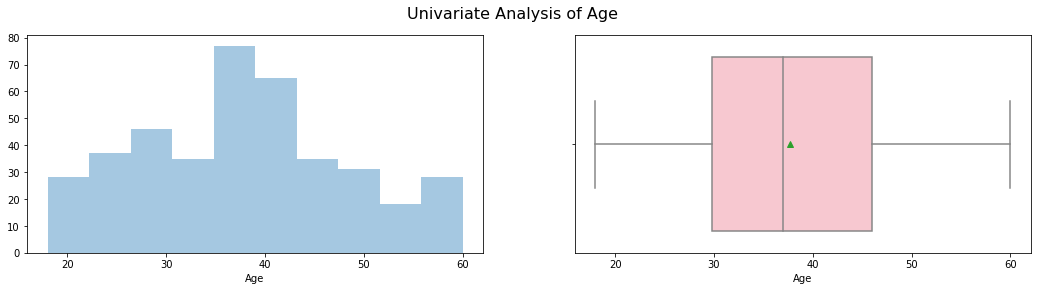

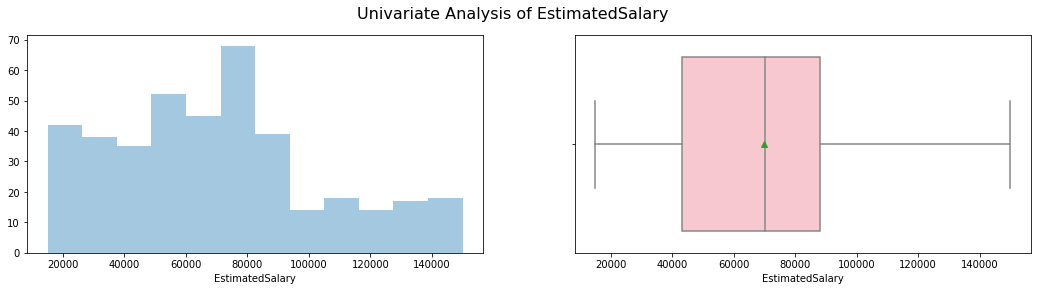

In [143]:
x_axis = ["Age", "EstimatedSalary"]
for x in x_axis:
    fig, axes = plt.subplots(1, 2, figsize=(18,4))
    sns.distplot(data[x], ax=axes[0], kde = False)
    sns.boxplot(data[x], ax=axes[1], orient = "h", showmeans = True, color = "pink")
    fig.suptitle('Univariate Analysis of ' + x, fontsize=16)

<font size="4" color="red"><b>Bi-Variate Analysis</b></font>

<font size="4"><b>scatter plot between input feature</b></font>

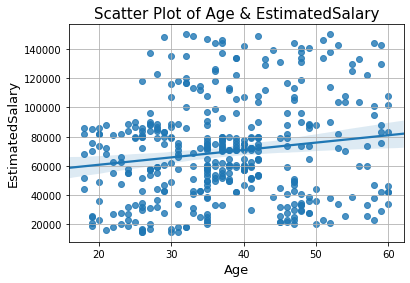

In [144]:
scatter_regplot('Age','EstimatedSalary',data)

<font color="blue" size="4"><b>Correlation Using Heatmap</b></font>

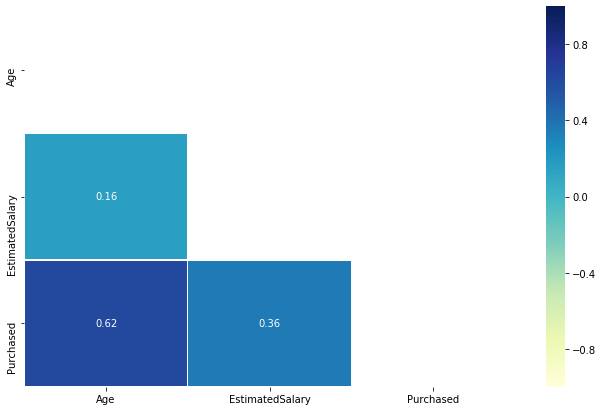

In [145]:
HeatMap(data)

<font size="4" color="green"><b>We can see that there is no correlation between input feature thus there is no multicollinearity and we can use both age and estimated salary in the model</b></font>

<font size="4" color="green"><b> To check Impact of "Estimated Salary" On "Purchased"</b></font>

<font size="4"><b> Purchased being Categorical and Estimated Salary being continuous we can use Anova Test</b></font> 

<Font color="blue" size="4"><b>Anova Test: To check for mean Difference between groups is significant or not !!
</b></font>

 * Null Hypothesis = No difference in group Mean
 * Alternate Hypothesis = Difference in group Mean

In [146]:
anova_df = data.copy()

In [147]:
import scipy.stats as stats

In [148]:
fvalue, pvalue = stats.f_oneway(anova_df[anova_df["Purchased"] == 1]["EstimatedSalary"], 
                               anova_df[anova_df["Purchased"] == 0]["EstimatedSalary"])

In [149]:
fvalue, pvalue

(60.05257919927239, 7.772785450069512e-14)

In [150]:
if (pvalue <= 0.05):
    print ("Reject Ho: There is difference")
else:
    print ("Accept Ho: Opss !! no difference")

Reject Ho: There is difference


<font size="3"> We Can also check mean of all group using Box plot </font>

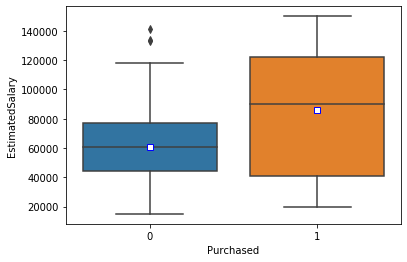

In [151]:
sns.boxplot(x = "Purchased", y = "EstimatedSalary", showmeans=True,data = data,meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"})

<font size="3"> Thus From Box Plot also we can see that "white Square" of all the groups are different i.e mean of all group is different</font>

<font size="4" color="green"><b> To check Impact of "Age" On "Purchased"</b></font>

<font size="4"><b> Purchased being Categorical and Age being continuous we can use Anova Test</b></font> 

<Font color="blue" size="4"><b>Anova Test: To check for mean Difference between groups is significant or not !!
</b></font>

 * Null Hypothesis = No difference in group Mean
 * Alternate Hypothesis = Difference in group Mean

In [152]:
anova_df = data.copy()

In [153]:
import scipy.stats as stats

fvalue, pvalue = stats.f_oneway(anova_df[anova_df["Purchased"] == 1]["Age"], 
                               anova_df[anova_df["Purchased"] == 0]["Age"])

In [154]:
fvalue, pvalue

(251.74206107179123, 2.800233943273413e-44)

In [155]:
if (pvalue <= 0.05):
    print ("Reject Ho: There is difference")
else:
    print ("Accept Ho: Opss !! no difference")

Reject Ho: There is difference


<font size="3"> We Can also check mean of all group using Box plot </font>

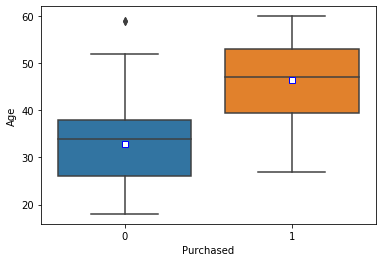

In [156]:
sns.boxplot(x = "Purchased", y = "Age", showmeans=True,data = data,meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"})

<font size="3"> Thus From Box Plot also we can see that "white Square" of all the groups are different i.e mean of all group is different</font>

<font size="4" color="green"><b>Thus we Can see that from above two Anova test that Both Age and Estimated have mean difference w.r.t Purchased Thus giving an clear idea that Age and estimated Salary are important for predicting Purchased</b></font>

<font size="4" color="green"><b>To check relation between Two catgorical variable we will use Chi-square Test</b></font>

    * Null Hypothesis = There is no association between the two variables
    * Alternate Hypothesis = There is an association between the two variables

In [157]:
table = pd.crosstab(data['Gender'],data['Purchased'])
table

Purchased,0,1
Gender,,
Female,127,77
Male,130,66


In [158]:
from scipy.stats import chi2_contingency

In [159]:
chi2_contingency(table)

(0.5550869364098915, 0.45624659183130645, 1, array([[131.07,  72.93],
        [125.93,  70.07]]))

In [160]:
stat,p,dof,expected = chi2_contingency(table)

In [161]:
if (p <= 0.05):
    print ("Reject Ho: There is an association between the two variables")
else:
    print ("Accept Ho: There is no association between the two variables")

Accept Ho: There is no association between the two variables


<font size="4" color="green"><b>Thus Chi-square Test tells that us that there is no association between Gender and Purchased, Thus it's ok if you don't add gender feature in model</b></font>

<Font color="blue" size="4"><b>Scatter Plot</b></font>

 * X = Estimated Salary
 * Y = Age
 * Hue = Purchased    

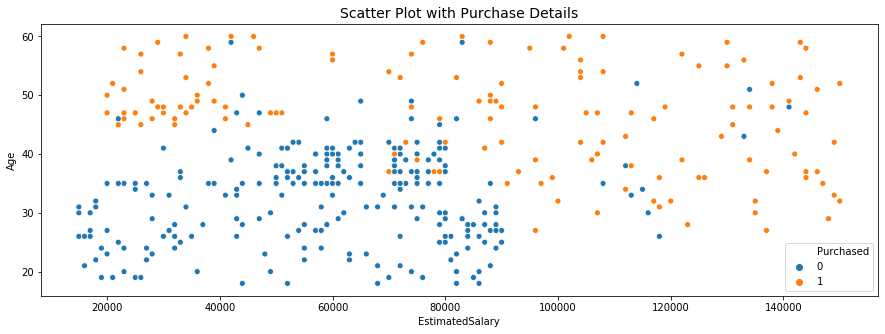

In [162]:
plt.figure(figsize = (15,5))
sns.scatterplot(x = "EstimatedSalary", y = "Age", data = data, hue = "Purchased")
plt.title("Scatter Plot with Purchase Details", fontsize = 14)
plt.show()

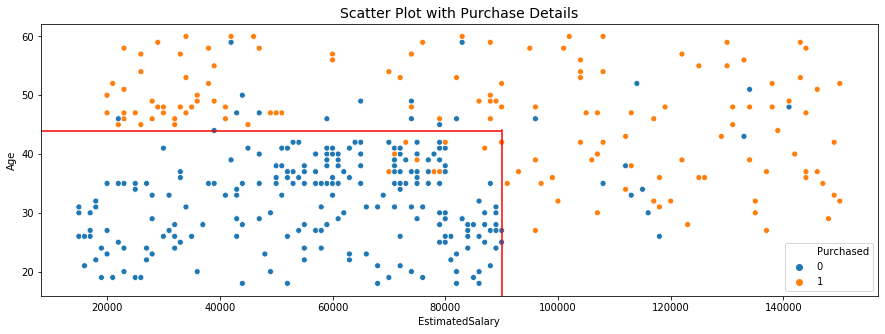

In [163]:
plt.figure(figsize = (15,5))
sns.scatterplot(x = "EstimatedSalary", y = "Age", data = data, hue = "Purchased")
plt.title("Scatter Plot with Purchase Details", fontsize = 14)
plt.axvline(90000,ymin= 0, ymax = 0.61, color = "red")
plt.axhline(44, xmin = 0, xmax = 0.55, color = "red")
#plt.axvline(90000, color = "red")
#plt.axhline(40, color = "red")
plt.show()

<font size="4" color="green"><b>Insights</b></font> 
    
    * Looks like this shop is not for people earning < 90k & Age < 40
    * Can we launch a product for Q3?
    * Any other service can be provided to on going customers?
    * Promotion plans & advertisment ideas

<Font color="blue" size="4"><b>Logistic Regression</b></font>

 * Lets start with very basic of classification using logistic regression

In [164]:
from sklearn.linear_model import LogisticRegression

<font size="6" color="maroon"><b><center><u>Model 1: Logistic Regression using Age</u></center></b></font>

In [165]:
X = data[["Age"]]
y = data[["Purchased"]]

In [166]:
# Split the data for train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y , train_size = 0.8, random_state = 100)   # 70-30 Split
logreg = LogisticRegression()   
logreg = logreg.fit(X_train, y_train)

In [167]:
logreg.coef_, logreg.intercept_   # Coef: B1 , Intercept: B0

(array([[0.12332162]]), array([-5.32078057]))

<font size="4" color="green"><b>Lets check model probabilities </b></font>

In [168]:
y_train_prob = logreg.predict_proba(X_train)[:,1] # 0: Not occurance 1: Occurance Probability
y_train_prob

array([0.08619053, 0.09641223, 0.08619053, 0.46474045, 0.31910655,
       0.2445589 , 0.06116718, 0.04844493, 0.05445699, 0.61664579,
       0.34647748, 0.37490346, 0.69958033, 0.29292867, 0.61664579,
       0.46474045, 0.37490346, 0.37490346, 0.06864418, 0.12014086,
       0.26805288, 0.46474045, 0.26805288, 0.26805288, 0.67304257,
       0.12014086, 0.55692515, 0.64534899, 0.67304257, 0.14874811,
       0.77122922, 0.12014086, 0.18275231, 0.1650488 , 0.52631828,
       0.1650488 , 0.14874811, 0.86198472, 0.12014086, 0.86198472,
       0.34647748, 0.07696024, 0.2445589 , 0.12014086, 0.46474045,
       0.20189557, 0.67304257, 0.29292867, 0.20189557, 0.10770329,
       0.26805288, 0.84664832, 0.31910655, 0.1650488 , 0.67304257,
       0.26805288, 0.26805288, 0.31910655, 0.12014086, 0.69958033,
       0.64534899, 0.10770329, 0.58710582, 0.10770329, 0.58710582,
       0.29292867, 0.08619053, 0.31910655, 0.77122922, 0.67304257,
       0.43423466, 0.22249815, 0.67304257, 0.87601197, 0.04844

<font size="4" color="green"><b>But output should be 1 or 0 </b></font>

In [169]:
y_train_predict = logreg.predict(X_train)
y_train_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,

In [170]:
X_train_op = X_train.copy()
X_train_op["Y_train_actuals"] = y_train["Purchased"]
X_train_op["Y_train_Prob"] = y_train_prob
X_train_op["Y_train_Pred"] = y_train_predict
#X_train_op["Y_train_Pred"] = np.where(X_train_op["Y_train_Prob"] > 0.8, 1, 0)
X_train_op.tail()

,Age,Y_train_actuals,Y_train_Prob,Y_train_Pred
343,47,1,0.616646,1
359,42,0,0.464740,0
323,48,1,0.645349,1
280,59,1,0.876012,1
8,25,0,0.096412,0


<font size="4" color="green"><b>Lets look how plot looks</b></font>

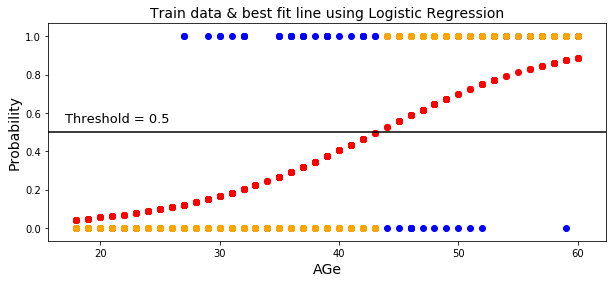

In [171]:
plt.figure(figsize = (10,4))
plt.scatter(X_train_op["Age"], X_train_op["Y_train_actuals"], color = "blue")
plt.scatter(X_train_op["Age"], X_train_op["Y_train_Prob"], color = "red")
plt.scatter(X_train_op["Age"], X_train_op["Y_train_Pred"], color = "orange")


plt.axhline(0.5, color = "black")
plt.xlabel("AGe", fontsize = 14)
plt.ylabel("Probability", fontsize = 14)
plt.title("Train data & best fit line using Logistic Regression", fontsize = 14)
plt.text(17, 0.55, "Threshold = 0.5", fontsize = 13)
plt.show()

<font size="4" color="green"><b>Error Evaluation</b></font>

<font size="4" color="Blue"><b>Confusion Matrix</b></font>

In [172]:
# Evalution 
from sklearn.metrics import confusion_matrix

In [173]:
cnf_matrix = confusion_matrix(X_train_op["Y_train_actuals"], X_train_op["Y_train_Pred"])
cnf_matrix

array([[194,  14],
       [ 37,  75]], dtype=int64)

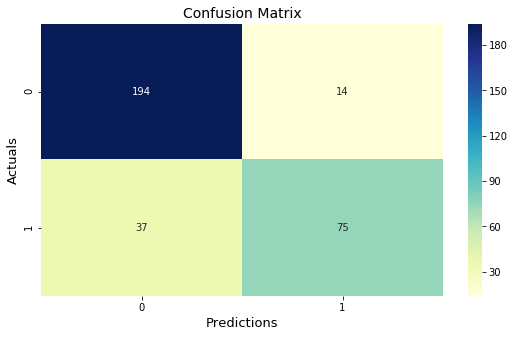

In [174]:
f, ax = plt.subplots(figsize=(9, 5))        # Sample figsize in inches
sns.heatmap(cnf_matrix, annot = True, ax=ax,cmap = "YlGnBu", fmt='.3g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel("Actuals", fontsize = 13)
plt.xlabel("Predictions", fontsize = 13)
plt.title("Confusion Matrix", fontsize = 14)
plt.show()

<font size="4" color="green"><b>Accuracy - Train Data</b></font>

In [175]:
from sklearn.metrics import accuracy_score

In [176]:
accuracy_score(X_train_op["Y_train_actuals"], X_train_op["Y_train_Pred"])  # Accuarcy using package

0.840625

<font size="4" color="green"><b>Lets predict on Test Data</b></font>

In [177]:
y_test_prob = logreg.predict_proba(X_test)[:,1]    # Prob of buying the product
y_test_pred = logreg.predict(X_test)            # 0 or 1

In [178]:
X_test_op = X_test.copy()
X_test_op["Y_test_actuals"] = y_test["Purchased"]
X_test_op["Y_test_Prob"] = y_test_prob
X_test_op["Y_test_Pred"] = y_test_pred
X_test_op.head()

,Age,Y_test_actuals,Y_test_Prob,Y_test_Pred
248,41,0,0.434235,0
318,45,1,0.556925,1
173,34,0,0.244559,0
285,37,1,0.319107,0
184,33,0,0.222498,0


<font size="4" color="green"><b>Accuracy - Test Data</b></font>

In [179]:
accuracy_score(X_test_op["Y_test_actuals"], X_test_op["Y_test_Pred"])*100  # Accuarcy using package

82.5

<font size="6" color="maroon"><b><center><u>Model 2: Logistic Regression using Age & Estimated Salary</u></center></b></font>

In [180]:
X = data[["Age", "EstimatedSalary"]]
y = data[["Purchased"]]

In [181]:
# Split the data for train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y , train_size = 0.8, random_state = 100)   # 70-30 Split

In [182]:
logreg = LogisticRegression()
logreg = logreg.fit(X_train, y_train)

In [183]:
logreg.coef_, logreg.intercept_

(array([[-6.87436446e-03,  1.78023220e-07]]), array([-0.00587332]))

In [184]:
y_train_prob = logreg.predict_proba(X_train)[:,1] # 0: Not occurance 1: Occurance Probability
y_train_predict = logreg.predict(X_train)

In [185]:
X_train_op = X_train.copy()
X_train["Y_train_actuals"] = y_train["Purchased"]
X_train_op["Y_train_Prob"] = y_train_prob
X_train_op["Y_train_Pred"] = y_train_predict
#X_train_op["Y_train_Pred"] = np.where(X_train_op["Y_train_Prob"] > 0.8, 1, 0)
X_train_op.tail()

,Age,EstimatedSalary,Y_train_Prob,Y_train_Pred
343,47,51000,0.420703,0
359,42,54000,0.429232,0
323,48,30000,0.418118,0
280,59,88000,0.402323,0
8,25,33000,0.457141,0


In [186]:
X_train_op["Y_train_Pred"]

190    0
46     0
50     0
377    0
121    0
      ..
343    0
359    0
323    0
280    0
8      0
Name: Y_train_Pred, Length: 320, dtype: int64

In [187]:
X_train_op["Y_train_Pred"].unique()

array([0], dtype=int64)

<font color="green" size="4"><b>All values predicted as 0..</b></font>

<font size="4" color="red"><b>We have two feature that is Age and Estimated Salary both the feature are of different units, thus while predicting model gives higher weightage to feature which has high value and in turn more wightage is given to Estimated Salary since its range is higher compared to age So all the output are 0. To overcome this we need to standardize the input feature (Use Z-score Standardization)</b></font>

<font size="6" color="maroon"><b><center><u>Model 3: Logistic Regression using Age & Estimated Salary (Standardize)</u></center></b></font>

In [188]:
from sklearn.preprocessing import StandardScaler

In [189]:
X = data[["Age", "EstimatedSalary"]]
y = data[["Purchased"]]

sc = StandardScaler()
X = sc.fit_transform(X)

X = pd.DataFrame(X,columns = ["Age", "EstimatedSalary"])

X.head()

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751


In [190]:
# Split the data for train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y , train_size = 0.8, random_state = 100)   # 70-30 Split

In [191]:
logreg = LogisticRegression()   # C = Higher value means low penality
logreg = logreg.fit(X_train, y_train)

In [192]:
logreg.coef_, logreg.intercept_

(array([[2.23644219, 1.0661075 ]]), array([-1.08375039]))

In [193]:
y_train_prob = logreg.predict_proba(X_train)[:,1] # 0: Not occurance 1: Occurance Probability
y_train_predict = logreg.predict(X_train)

In [194]:
X_train_op = X_train.copy()
X_train_op["Y_train_actuals"] = y_train["Purchased"]
X_train_op["Y_train_Prob"] = y_train_prob
X_train_op["Y_train_Pred"] = y_train_predict
#X_train_op["Y_train_Pred"] = np.where(X_train_op["Y_train_Prob"] > 0.5, 1, 0)
X_train_op.tail()

,Age,EstimatedSalary,Y_train_actuals,Y_train_Prob,Y_train_Pred
343,0.892570,-0.550371,1,0.580707,1
359,0.415005,-0.462276,0,0.343338,0
323,0.988083,-1.167033,1,0.470499,0
280,2.038728,0.536129,1,0.982831,1
8,-1.208719,-1.078938,0,0.007123,0


In [195]:
accuracy_score(X_train_op["Y_train_actuals"], X_train_op["Y_train_Pred"]) *100 # Accuarcy using package

85.3125

In [196]:
logreg.coef_, logreg.intercept_

(array([[2.23644219, 1.0661075 ]]), array([-1.08375039]))

<font size="4" color="green"><b>To get boundry Line</b></font>

    1) y = B0 + B1x1 + B2x2
    2) y to be 0 (weights are 0)
    3) 0 = B0 + B1x1 + B2x2
    3) (- B2x2) = B0 + B1x1
    5) x2 = -(B0 + B1*x1)/B2
    6) x2 = -(logreg.intercept[0] + logreg.coef[0]x1)/logreg.coef_[1] #### X_train_op_1["Boundary"] = -(B0 + B1X_train_op_1["Age"])/B2

In [197]:
X_train_op_1 = X_train_op.copy()
X_train_op_1["Boundary"] = -(logreg.intercept_[0] + logreg.coef_[0][0]*X_train_op_1["Age"])/logreg.coef_[0][1]
#X_train_op_1["Boundary"] = -(logreg.intercept_[0] + logreg.coef_[0][1]*X_train_op_1["EstimatedSalary"])/logreg.coef_[0][0]

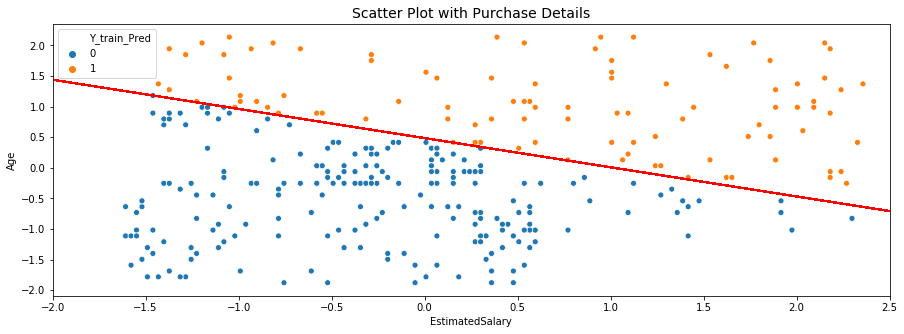

In [198]:
plt.figure(figsize = (15,5))
sns.scatterplot(x = "EstimatedSalary", y = "Age", data = X_train_op, hue = "Y_train_Pred")
plt.plot(X_train_op_1["Boundary"], X_train_op_1["Age"], color = "red")

plt.xlim(-2,2.5)
plt.title("Scatter Plot with Purchase Details", fontsize = 14)
plt.show()

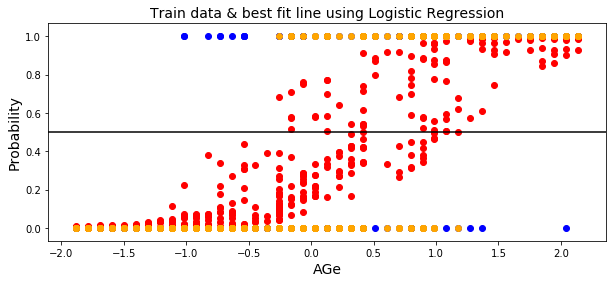

In [199]:
plt.figure(figsize = (10,4))
plt.scatter(X_train_op_1["Age"], X_train_op["Y_train_actuals"], color = "blue")
plt.scatter(X_train_op_1["Age"], X_train_op["Y_train_Prob"], color = "red")
plt.scatter(X_train_op_1["Age"], X_train_op["Y_train_Pred"], color = "orange")


plt.axhline(0.5, color = "black")
plt.xlabel("AGe", fontsize = 14)
plt.ylabel("Probability", fontsize = 14)
plt.title("Train data & best fit line using Logistic Regression", fontsize = 14)
#plt.text(17, 0.55, "Threshold = 0.5", fontsize = 13)
plt.show()

In [200]:
accuracy_score(X_test_op["Y_test_actuals"], X_test_op["Y_test_Pred"])  # On Test Data

0.825

<font size="4" color="green"><b>Conclusing Statement</b></font>

  We can conclude that Age and Estimated Salary after standardizing gives an accuracy of 85% for train and 82% for test